In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize']= (15,5)

In [3]:
path = "data/"
filename = "dinheirorestante.csv"
file = path + str(filename)
df = pd.read_csv(file, delimiter=';')

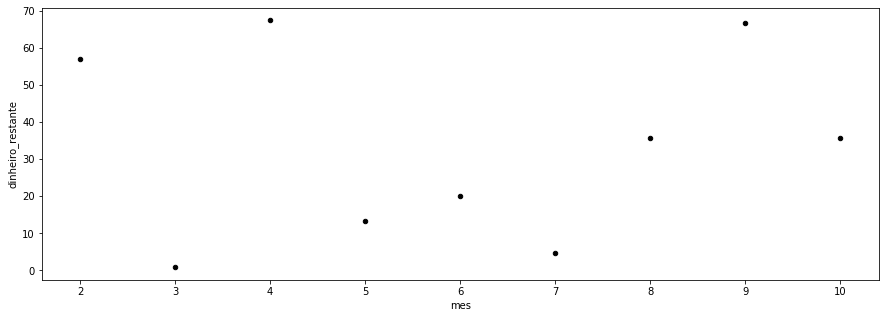

In [4]:
df.plot(kind='scatter', x='mes', y='dinheiro_restante', color='black')

In [5]:
df['dinheiro_restante'].describe()

count     9.000000
mean     33.448889
std      25.752132
min       0.750000
25%      13.200000
50%      35.590000
75%      56.880000
max      67.420000
Name: dinheiro_restante, dtype: float64

In [6]:
# Dropando ultima linha do df

In [7]:
restantemes10 = df['dinheiro_restante'].values[-1]
df = df.drop(df.index[-1])

target_df = [[restantemes10]]

In [8]:
df.tail()

,mes,dinheiro_restante
3,5,13.20
4,6,20.06
5,7,4.70
6,8,35.71
7,9,66.73


In [9]:
# Importando modelo de regressao linear

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

In [11]:
model = LinearRegression()

In [12]:
X = pd.DataFrame(df['mes'])
y = pd.DataFrame(df['dinheiro_restante'])

In [13]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
pred_df = (model.predict([[10]]))

In [15]:
pred_df

array([[36.52678571]])

In [18]:
y_test = pred_df
y_pred = target_df
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  0.9367857142857119
MSE 0.8775674744897914
RMSE 0.9367857142857119


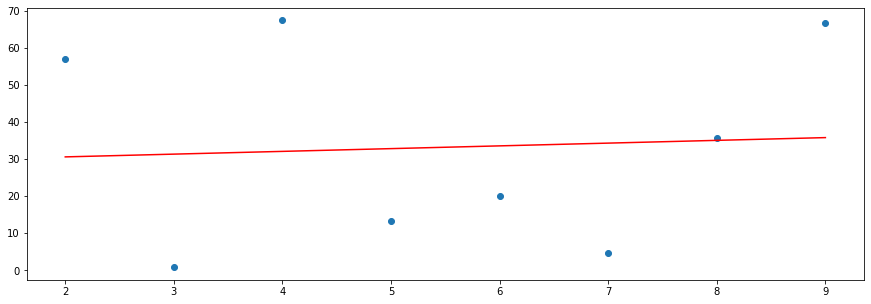

In [17]:
Y_pred = model.predict(X)
plt.scatter(X,y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [19]:
# Pontos muito distantes da reta porém métrica com taxa de erros baixa